# FASHIO_NMNIST_IMAGE_CLASSIFICATION_USING_ANN_&_CNN

## Loading the Data 

In [268]:
import tensorflow as tf 
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [269]:
#from keras.datasets let's import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = tf.keras.datasets.fashion_mnist.load_data()

## Analyzing the Data  

Let's now analyze how images in the dataset look like. 

In [270]:
from tensorflow.keras.utils import to_categorical


print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


From the above output, we can see that the training data has a shape of 60000 x 28 x 28 since there are 60,000 training samples each of 28 x 28 dimension. Similarly, the test data has a shape of 10000 x 28 x 28 since there are 10,000 testing samples.

In [271]:
# Let's find the unique number of classes from the train labels.
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


There is a total of 10 output classes that range from 0 to 9.

Text(0.5, 1.0, 'Ground Truth : 9')

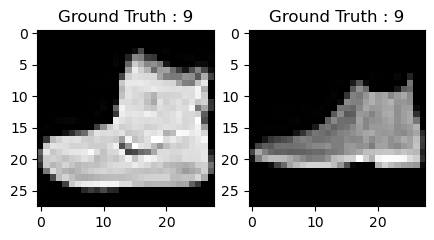

In [272]:
plt.figure(figsize=[5,5])

# Let's display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Let's display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

The output of above two plots looks like an ankle boot, and this class is assigned a class label of 9. Similarly, other fashion products will have different labels, but similar products will have same labels.

In [273]:
# Extracting class labels.
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

## Data Preprocessing 

As we could see in the above plot, the images are grayscale images have pixel values that range from 0 to 255. Also, these images have a dimension of 28 x 28. As a result, we will need to preprocess the data before we feed it into the model. 

In [274]:
train1_X = train_X
train1_Y = train_Y
test1_X  = test_X
test1_Y  = test_Y

In [275]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

The data now is in an int8 format, so before we feed it into the network we need to convert its type to float32, and we also have to rescale the pixel values in range 0 - 1.

In [276]:
train1_X = train1_X.astype('float32')
test1_X =  test1_X.astype('float32')
train1_X = train1_X/255
test1_X =  test1_X/255

In [277]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

# Applying ANN

First, let's import all the necessary modules required to train the model.

In [244]:
import keras
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model


In [245]:
model_A = keras.models.Sequential([
                         keras.layers.Flatten(input_shape=[28,28]),
                         keras.layers.Dense(units=32, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [246]:
model_A.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 32)                25120     
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Formula for calculation of parameters above for dense layer:

(input_channels + 1) * num_filters

(784+1)*32 = 25120

In [247]:
model_A.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [248]:
model_A.fit(train1_X,train1_Y, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5477 - accuracy: 0.8095
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4173 - accuracy: 0.8540
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3839 - accuracy: 0.8641
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3629 - accuracy: 0.8700
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3477 - accuracy: 0.8751
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3342 - accuracy: 0.8801
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3225 - accuracy: 0.8831
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3135 - accuracy: 0.8863
Epoch 9/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3058 - accuracy: 0.8894
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.299

# To Test and Evaluate Neural Network Model

In [250]:
model_A.evaluate(test1_X,test1_Y)

313/313 [==============================] - 1s 2ms/step - loss: 0.3613 - accuracy: 0.8736


[0.36133983731269836, 0.8736000061035156]

Although accuracy seems to be good but the loss value is still larger.

In [251]:
y_pred = model_A.predict(test1_X)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[1.7285188e-07, 1.1445051e-11, 3.2964706e-06, ..., 8.1504993e-03,
        2.1260548e-06, 9.9135393e-01],
       [4.2892116e-06, 1.7049874e-15, 9.9667513e-01, ..., 4.4880403e-28,
        8.0775948e-11, 2.7352346e-16],
       [4.8749562e-06, 9.9999428e-01, 5.1853885e-07, ..., 2.3180865e-15,
        5.9663129e-11, 3.5960413e-21],
       ...,
       [4.3270271e-04, 4.7629224e-13, 4.3946606e-04, ..., 1.2011677e-13,
        9.9703741e-01, 1.4352300e-15],
       [2.1482006e-06, 9.9981636e-01, 2.9944241e-07, ..., 6.2659922e-09,
        7.1714583e-12, 3.4973704e-12],
       [7.6590886e-06, 5.6035651e-07, 7.4924661e-05, ..., 1.1244827e-02,
        1.3642558e-03, 2.9664722e-04]], dtype=float32)

In [252]:
y_pred = np.argmax(np.round(y_pred),axis=1)

# Classification report for ANN

In [253]:

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test1_Y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.67      0.87      0.76      1000
     Class 1       0.99      0.95      0.97      1000
     Class 2       0.85      0.71      0.77      1000
     Class 3       0.82      0.92      0.87      1000
     Class 4       0.78      0.80      0.79      1000
     Class 5       0.97      0.94      0.96      1000
     Class 6       0.78      0.61      0.69      1000
     Class 7       0.94      0.94      0.94      1000
     Class 8       0.98      0.95      0.96      1000
     Class 9       0.94      0.97      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [254]:
y_pred[4].round(2)

6

In [255]:
np.argmax(y_pred[6].round(2))

0

In [256]:
# Classes
#0 => T-shirt/top 
#1 => Trouser 
#2 => Pullover 
#3 => Dress 
#4 => Coat 
#5 => Sandal 
#6 => Shirt 
#7 => Sneaker 
#8 => Bag 
#9 => Ankle boot

## Applying CNN now.

In Keras, we can just stack up layers by adding the desired layer one by one. That's exactly what we will do here: we will first add a first convolutional layer with Conv2D(). Note that we use this function because we are working with images. Next, we add the Leaky ReLU activation function which helps the network learn non-linear decision boundaries. Since we have ten different classes, we will need a non-linear decision boundary that could separate these ten classes which are not linearly separable.

More specifically, we add Leaky ReLUs because they attempt to fix the problem of dying Rectified Linear Units (ReLUs). The ReLU activation function is used a lot in neural network architectures and more specifically in convolutional networks, where it has proven to be more effective than the widely used logistic sigmoid function. The ReLU function allows the activation to be thresholded at zero. However, during the training, ReLU units can "die". This can happen when a large gradient flows through a ReLU neuron: it can cause the weights to update in such a way that the neuron will never activate on any data point again. If this happens, then the gradient flowing through the unit will forever be zero from that point on. Leaky ReLUs attempt to solve this: the function will not be zero but will instead have a small negative slope.

Next,we will add the max-pooling layer with MaxPooling2D() and so on. The last layer is a Dense layer that has a softmax activation function with 10 units, which is needed for this multi-class classification problem.

We will use a batch size of 64 using a higher batch size of 128 or 256 is also preferable it all depends on the memory. It contributes massively to determining the learning parameters and affects the prediction accuracy. We will train the network for 20 epochs.

In [278]:
batch_size = 64
epochs = 20
num_classes = 10

In [279]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

## Let's compile the Model 

After the model is created, we compile it using the Adam optimizer, one of the most popular optimization algorithms. Additionally, we specify the loss type which is categorical cross entropy which is used for multi-class classification. Lastly, we specify the metrics as accuracy which we want to analyze while the model is training.

In [280]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

Let's visualize the layers that we created in the above steps by using the summary function. This will show some parameters in each layer and also the total parameters in our model.

In [281]:
fashion_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                               

## Let's train the Model 

Let's convert first to one-hot encoding of class labels.
In one-hot encoding, we convert the categorical data into a vector of numbers. The reason why we convert the categorical data in one hot encoding is that machine learning algorithms cannot work with categorical data directly. we generate one boolean column for each category or class. Only one of these columns could take on the value 1 for each sample. Hence, the term one-hot encoding.

For our problem statement, the one hot encoding will be a row vector, and for each image, it will have a dimension of 1 x 10. The important thing to note here is that the vector consists of all zeros except for the class that it represents, and for that, it is 1. For example, the ankle boot image that we plotted above has a label of 9, so for all the ankle boot images, the one hot encoding vector would be [0 0 0 0 0 0 0 0 1 0].

So let's convert the training and testing labels into one-hot encoding vectors:

In [282]:
# Let's change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Let's display the category label using one-hot encoding
print('Original label:', train_Y[20])
print('After conversion to one-hot:', train_Y_one_hot[20])

Original label: 3
After conversion to one-hot: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In machine learning or any data specific task, we should partition the data correctly. For the model to generalize well, we split the training data into two parts, one designed for training and another one for validation. In this case, we will train the model on 80% of the training data and validate it on 20% of the remaining training data. This will also help to reduce overfitting since we will be validating the model on the data it would not have seen in training phase, which will help in boosting the test performance.

In [283]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [284]:
# Let's check the shape again.
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [285]:
# Let's train the model now.
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 79s 104ms/step - loss: 0.4609 - accuracy: 0.8339 - val_loss: 0.3575 - val_accuracy: 0.8672
Epoch 2/20
750/750 [==============================] - 76s 101ms/step - loss: 0.2893 - accuracy: 0.8941 - val_loss: 0.2752 - val_accuracy: 0.9007
Epoch 3/20
750/750 [==============================] - 76s 101ms/step - loss: 0.2389 - accuracy: 0.9133 - val_loss: 0.2512 - val_accuracy: 0.9101
Epoch 4/20
750/750 [==============================] - 80s 106ms/step - loss: 0.2077 - accuracy: 0.9240 - val_loss: 0.2391 - val_accuracy: 0.9124
Epoch 5/20
750/750 [==============================] - 79s 105ms/step - loss: 0.1813 - accuracy: 0.9333 - val_loss: 0.2351 - val_accuracy: 0.9143
Epoch 6/20
750/750 [==============================] - 79s 105ms/step - loss: 0.1586 - accuracy: 0.9412 - val_loss: 0.2250 - val_accuracy: 0.9193
Epoch 7/20
750/750 [==============================] - 79s 105ms/step - loss: 0.1376 - accuracy: 0.9490 - val_loss: 0.2380 - val_ac

## Model Evaluation of the Test Data Set 

In [286]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [287]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.48750758171081543
Test accuracy: 0.9193000197410583


The test accuracy looks impressive. It turns out that our classifier does better with mean accuracy of 0.919. But the loss is still too high- 0.487.

Let's put our model evaluation into perspective and plot the accuracy and loss plots between training and validation data:

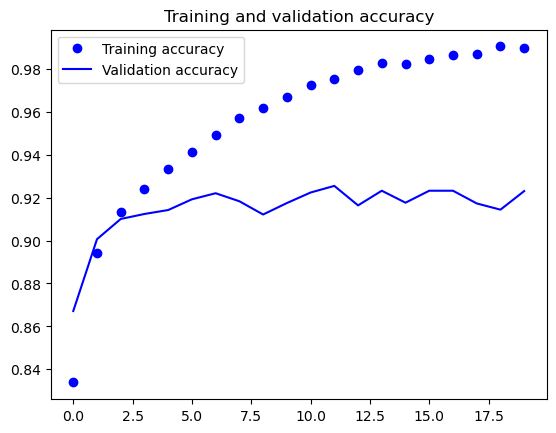

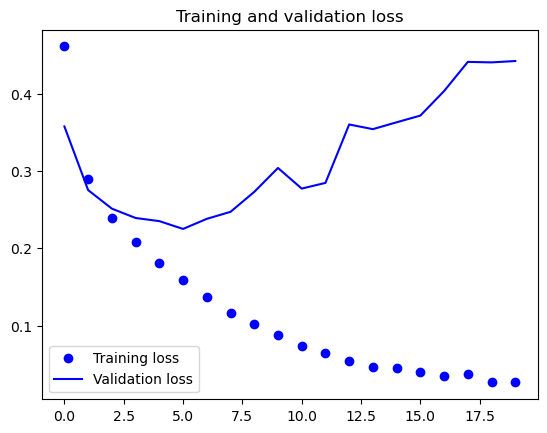

In [288]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

From the above two plots, we can see that the validation accuracy almost became stagnant after 4-5 epochs and slightly increased at certain epochs further.

The validation loss shows that this is the sign of overfitting, similar to validation accuracy it linearly decreased but after about 5th epoch it started to increase. This means that the model tried to memorize the data and succeeded.

With this in mind, it's time to introduce dropout into our model and see if it helps in reducing overfitting.

## Adding Dropout into the Network 

We can add a dropout layer to overcome the problem of overfitting to some extent. Dropout randomly turns off a fraction of neurons during the training process, reducing the dependency on the training set by some amount. How many fractions of neurons we want to turn off is decided by a hyperparameter, which can be tuned accordingly. This way, turning off some neurons will not allow the network to memorize the training data since not all the neurons will be active at the same time and the inactive neurons will not be able to learn anything.

So let's create, compile and train the network again but this time with dropout. And run it for 20 epochs with a batch size of 64.

In [289]:
batch_size = 64
epochs = 20
num_classes = 10

In [290]:
fashion_model1 = Sequential()
fashion_model1.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model1.add(LeakyReLU(alpha=0.1))
fashion_model1.add(MaxPooling2D((2, 2),padding='same'))
fashion_model1.add(Dropout(0.25))
fashion_model1.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model1.add(LeakyReLU(alpha=0.1))
fashion_model1.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model1.add(Dropout(0.25))
fashion_model1.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model1.add(LeakyReLU(alpha=0.1))                  
fashion_model1.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model1.add(Dropout(0.4))
fashion_model1.add(Flatten())
fashion_model1.add(Dense(128, activation='linear'))
fashion_model1.add(LeakyReLU(alpha=0.1))           
fashion_model1.add(Dropout(0.3))
fashion_model1.add(Dense(num_classes, activation='softmax'))

In [291]:
fashion_model1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_29 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                     

In [293]:
fashion_model1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [294]:
fashion_train_dropout = fashion_model1.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 86s 113ms/step - loss: 0.5984 - accuracy: 0.7765 - val_loss: 0.3839 - val_accuracy: 0.8555
Epoch 2/20
750/750 [==============================] - 90s 121ms/step - loss: 0.3718 - accuracy: 0.8639 - val_loss: 0.3092 - val_accuracy: 0.8849
Epoch 3/20
750/750 [==============================] - 88s 117ms/step - loss: 0.3237 - accuracy: 0.8815 - val_loss: 0.2776 - val_accuracy: 0.8950
Epoch 4/20
750/750 [==============================] - 88s 117ms/step - loss: 0.2972 - accuracy: 0.8906 - val_loss: 0.2732 - val_accuracy: 0.8972
Epoch 5/20
750/750 [==============================] - 85s 114ms/step - loss: 0.2791 - accuracy: 0.8963 - val_loss: 0.2399 - val_accuracy: 0.9140
Epoch 6/20
750/750 [==============================] - 88s 117ms/step - loss: 0.2636 - accuracy: 0.9026 - val_loss: 0.2388 - val_accuracy: 0.9116
Epoch 7/20
750/750 [==============================] - 87s 116ms/step - loss: 0.2504 - accuracy: 0.9064 - val_loss: 0.2273 - val_ac

Let's save the model so that we can directly load it and not have to train it again for 20 epochs. This way, we can load the model later on if we need it and modify the architecture; Alternatively, we can start the training process on this saved model. It is always a good idea to save the model -and even the model's weights!- because it saves time. Note that we can also save the model after every epoch so that, if some issue occurs that stops the training at an epoch, we will not have to start the training from the beginning.

In [295]:
fashion_model1.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py\assets


INFO:tensorflow:Assets written to: fashion_model_dropout.h5py\assets


## Model Evaluation on the Test Data Set 

Finally, let's also evaluate our new model and see how it performs.

In [296]:
test_eval = fashion_model1.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 5s 16ms/step - loss: 0.2214 - accuracy: 0.9230


In [297]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22140873968601227
Test accuracy: 0.9229999780654907


Looks like adding Dropout in our model worked, even though the test accuracy did not improve significantly but the test loss(0.221) decreased much compared to the previous results(0.487).

Now, let's plot the accuracy and loss plots between training and validation data.

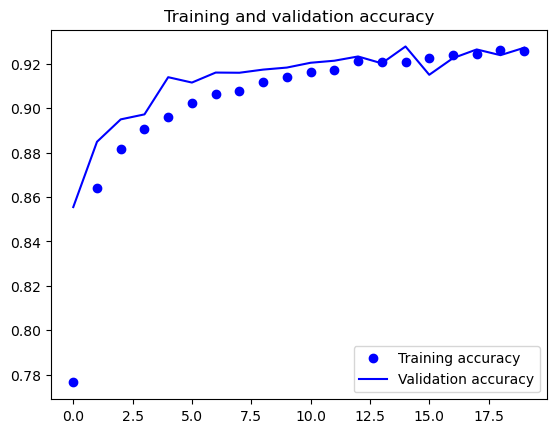

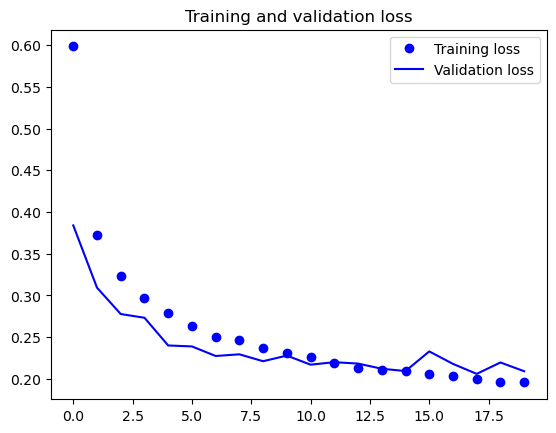

In [298]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss'] 
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Finally, we can see that the validation loss and validation accuracy both are almost in sync with the training loss and training accuracy. Even though the validation loss and accuracy line are not linear, but it shows that our model is not overfitting: the validation loss is decreasing and not increasing, and there is not much gap between training and validation accuracy.

Therefore, we can say that your model's generalization capability became much better since the loss on both test set and validation set was only slightly more compared to the training loss.

## Let's predict labels 

In [299]:
predicted_classes = fashion_model1.predict(test_X)

313/313 [==============================] - 6s 17ms/step


Since the predictions we get are floating point values, it will not be feasible to compare the predicted labels with true test labels. So, we will round off the output which will convert the float values into an integer. Further, we will use np.argmax() to select the index number which has a higher value in a row.

For example, let's assume a prediction for one test image to be 0 1 0 0 0 0 0 0 0 0, the output for this should be a class label 1.

In [300]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [301]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9200 correct labels


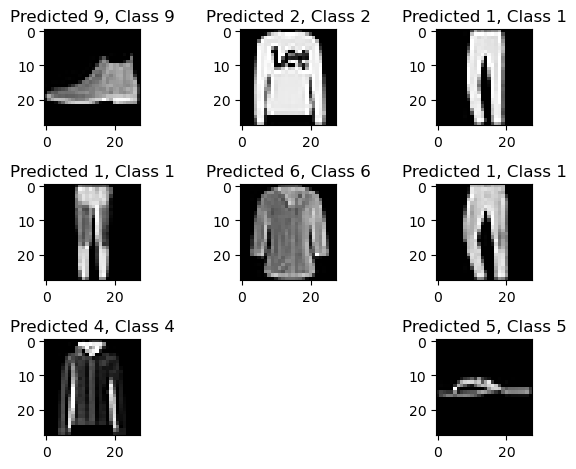

In [302]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 800 incorrect labels


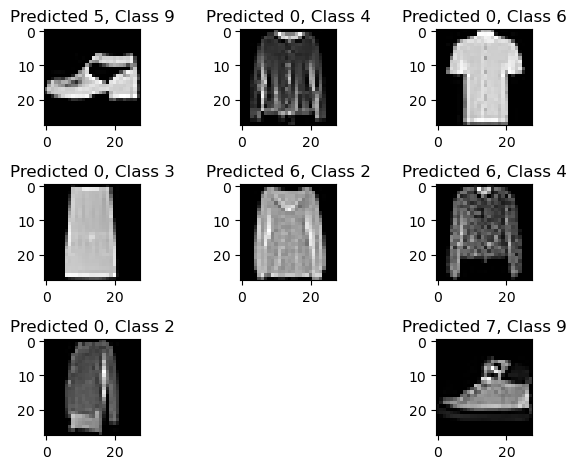

In [303]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

By looking at a few images, we cannot be sure as to why our model is not able to classify the above images correctly, but it seems like a variety of the similar patterns present on multiple classes affect the performance of the classifier although CNN is a robust architecture. 

## Classification Report 

Classification report will help us in identifying the misclassified classes in more detail. We will be able to observe for which class the model performed bad out of the given ten classes.

In [304]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.91      0.84      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.86      0.90      0.88      1000
     Class 3       0.92      0.92      0.92      1000
     Class 4       0.89      0.86      0.88      1000
     Class 5       0.99      0.99      0.99      1000
     Class 6       0.84      0.69      0.76      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



We can see that the classifier is underperforming for class 6 regarding both precision and recall. For class 0 , the classifier is lacking precision. Also, for class 4, the classifier is slightly lacking both precision and recall.

# As anticipated, the CNN model with the dropout layer demonstrated the highest performance, yielding a test loss of 0.22 and a test accuracy of 0.92 on this particular dataset.